In [ ]:

#PROBLEMÁTICA:  Actualmente la cartera de la organización representa una gran cantidad de ingresos retenidos y requiere fortalecer sus estrategias de cobro para reducir la misma. La empresa actualmente realiza scoring de sus clientes con base en su histórico de cartera.

#SOLUCIÓN: La problemática puede ser atacada desde la ciencia de datos al utilizar el histórico de PQR`s de reclamación y la cantidad de facturas vencidas de un cliente por cada ciclo de facturación para predecir el comportamiento de cartera los mismos asi como planear el presupuesto para obligaciones bancarias.


#PREGUNTA SMART: "¿Cómo se puede utilizar histórico de cantidad de facturas vencidas de un cliente para predecir con un 85% de precisión el número de clientes que incrementarán su deuda en los próximos tres meses, permitiendo así implementar estrategias preventivas antes del final del próximo trimestre y tener conocimiento de los ingresos con los que se cuenta para la planeación del presupuesto?"

#DESGLOSE COMPONENTES PREGUNTA

#Específica: Se enfoca en predecir el número de clientes que incrementarán su cartera.
#Medible: La precisión deseada es del 85%.
#Accionable: Se basa en el scoring actual de la empresa.
#Relevancia: Permite implementar estrategias preventivas, cruciales para la gestión de riesgos.
#Temporalidad: El objetivo es lograr esta predicción antes del final del próximo trimestre.
#Tipo de análisis: predictivo



In [ ]:
# CONSULTA SQL PARA EXTRACCION DE DATOS

#SELECT
#   CICLO,
#  SUM(FACTURAS_VENCIDAS) AS TOTAL_FACTURAS_VENCIDAS,
#    COUNT(CLIENTE_ID_INTERNO) AS TOTAL_IDS_CICLO
#FROM
#    facturas.m05_saldo_cartera_factura
#WHERE
#    CICLO BETWEEN '202306 ' AND '202406'
#GROUP BY
#    CICLO

In [75]:
# Importar librería pandas
import pandas as pd
import matplotlib.pylab as plt
import plotly.express as px

# URL del dataset
filename = "/Users/christianoyola/Documents/GENERAL/Christian/UNIVERSIDAD/MAESTRIA/SEMESTRE 1/ANALISIS EXPLORATORIO DE DATOS/ANALISIS-EXPLORATORIO-DE-DATOS-CFO/BASE ANALISIS BIVARIADO.xlsx"


# Leer el archivo EXCEL
df = pd.read_excel(filename, engine='openpyxl')

df



,CICLO,TOTAL_FACTURAS_VENCIDAS,TOTAL_IDS_CICLO,TOTAL_PQR_RECLAMACION
0,202306,20795,34031,1669
1,202307,20410,34072,1812
2,202308,21447,34177,1690
3,202309,21907,34209,1897
4,202310,22283,34224,1416
5,202311,21140,34176,1334
6,202312,21531,34157,1230
7,202401,21930,34169,1541
8,202402,22706,34133,1732
9,202403,21383,34098,1319


In [2]:
# Para ver cómo luce el dataset, utilizamos el método head().
df.head(5)



,CICLO,TOTAL_FACTURAS_VENCIDAS,TOTAL_IDS_CICLO,TOTAL_PQR_RECLAMACION
0,202306,20795,34031,1669
1,202310,22283,34224,1812
2,202309,21907,34209,1690
3,202403,21384,34099,1897
4,202402,22706,34133,1416


In [ ]:
# VARIABLE SELECCIONADA: FACTURAS_VENCIDAS
# IMPORTANCIA: Permite conocer el comportamiento de cartera en un intervalo de tiempo.

In [49]:
# Para ver cómo luce el dataset, utilizamos el método tail().
df.tail(5)

,CICLO,TOTAL_FACTURAS_VENCIDAS,TOTAL_IDS_CICLO,TOTAL_PQR_RECLAMACION
8,202402,22706,34133,1732
9,202403,21383,34098,1319
10,202404,21486,34089,1153
11,202405,22058,34094,1141
12,202406,21500,34094,1114


In [47]:
#Obtener el tamaño del dataset.
df.shape

(13, 4)

In [51]:
# Para ver una descripcion general utilizamos el método df.describe().
df.describe()

,CICLO,TOTAL_FACTURAS_VENCIDAS,TOTAL_IDS_CICLO,TOTAL_PQR_RECLAMACION
count,13.000000,13.000000,13.000000,13.000000
mean,202352.615385,21582.769231,34132.538462,1465.230769
std,49.072291,610.516060,57.763332,273.551078
min,202306.000000,20410.000000,34031.000000,1114.000000
25%,202309.000000,21383.000000,34094.000000,1230.000000
50%,202312.000000,21500.000000,34133.000000,1416.000000
75%,202403.000000,21930.000000,34176.000000,1690.000000
max,202406.000000,22706.000000,34224.000000,1897.000000


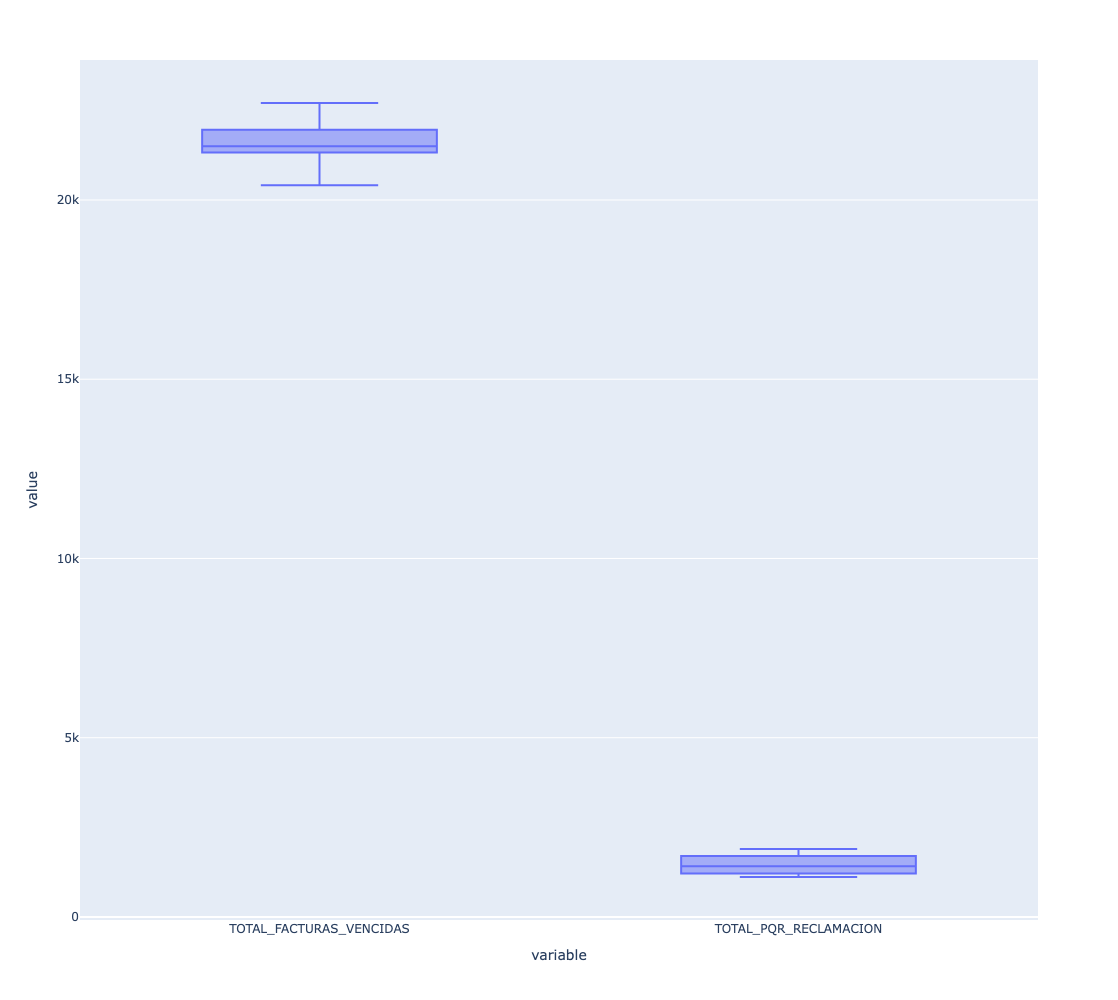

In [105]:
fig = px.box(df, y=['TOTAL_FACTURAS_VENCIDAS', 'TOTAL_PQR_RECLAMACION'])

fig.update_layout(
    width=1000,  # Ancho de la figura en píxeles
    height=1000  # Alto de la figura en píxeles
)


fig.show()


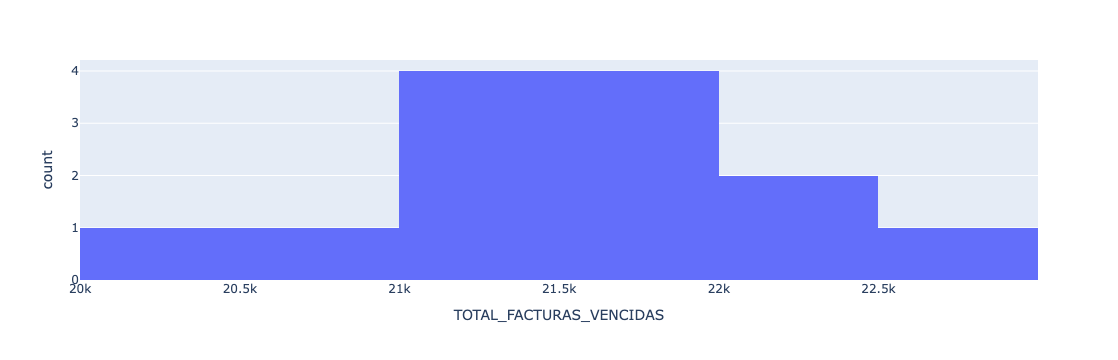

In [81]:
# HISTOGRAMA
fig = px.histogram(df, x='TOTAL_FACTURAS_VENCIDAS')
fig.show()

#Conclusión:: Luego de corrección en base de datos, no hay presencia de datos atípicos en el dataset.

In [57]:
#Frecuencia de valores

df.TOTAL_FACTURAS_VENCIDAS.value_counts()

TOTAL_FACTURAS_VENCIDAS
20795    1
20410    1
21447    1
21907    1
22283    1
21140    1
21531    1
21930    1
22706    1
21383    1
21486    1
22058    1
21500    1
Name: count, dtype: int64

In [59]:
#Tipos de datos

df.dtypes

CICLO                      int64
TOTAL_FACTURAS_VENCIDAS    int64
TOTAL_IDS_CICLO            int64
TOTAL_PQR_RECLAMACION      int64
dtype: object

In [83]:
#Top 10 valores mas grandes de la variable TOTAL_FACTURAS_VENCIDAS

df.nlargest(3,'TOTAL_FACTURAS_VENCIDAS')


,CICLO,TOTAL_FACTURAS_VENCIDAS,TOTAL_IDS_CICLO,TOTAL_PQR_RECLAMACION
8,202402,22706,34133,1732
4,202310,22283,34224,1416
11,202405,22058,34094,1141


In [85]:
#Top 10 valores mas pequeños de la variable TOTAL_FACTURAS_VENCIDAS

df.nsmallest(3,'TOTAL_FACTURAS_VENCIDAS')

,CICLO,TOTAL_FACTURAS_VENCIDAS,TOTAL_IDS_CICLO,TOTAL_PQR_RECLAMACION
1,202307,20410,34072,1812
0,202306,20795,34031,1669
5,202311,21140,34176,1334


In [87]:
#Dterminar si hay presencia de nulos.

df.isna().sum()

# Conclusión: no hay presencia de valores nulos en las variables.

CICLO                      0
TOTAL_FACTURAS_VENCIDAS    0
TOTAL_IDS_CICLO            0
TOTAL_PQR_RECLAMACION      0
dtype: int64

In [89]:
#Información dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   CICLO                    13 non-null     int64
 1   TOTAL_FACTURAS_VENCIDAS  13 non-null     int64
 2   TOTAL_IDS_CICLO          13 non-null     int64
 3   TOTAL_PQR_RECLAMACION    13 non-null     int64
dtypes: int64(4)
memory usage: 548.0 bytes


In [33]:
#CONCLUSIONES: Variable no presenta distribución normal y se ve influida por datos atípicos. Se de debe ajustar consulta para extraer información.


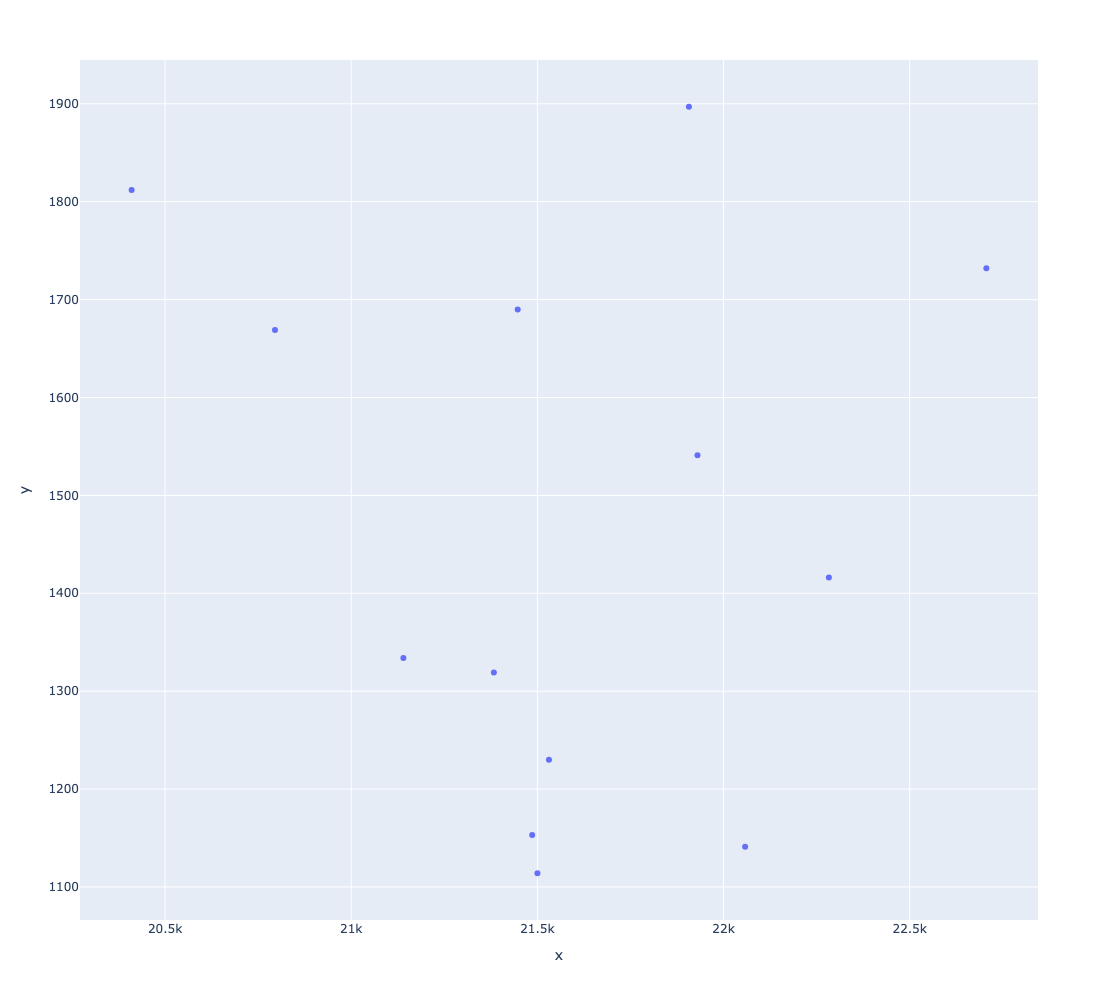

In [157]:
#Diagrama de dispersion 
fig = px.scatter(x=df['TOTAL_FACTURAS_VENCIDAS'], y=df['TOTAL_PQR_RECLAMACION'])


fig.update_layout(
    width=1000,  # Ancho de la figura en píxeles
    height=1000  # Alto de la figura en píxeles
)


fig.show()

In [97]:
# Calcular el coeficiente de correlación de Pearson entre dos columnas
coeficiente_correlacion = df['TOTAL_FACTURAS_VENCIDAS'].corr(df['TOTAL_PQR_RECLAMACION'])

# Mostrar el coeficiente de correlación
print(f'Coeficiente de correlación de Pearson: {coeficiente_correlacion}')
print('Conclusión: Hay una relación negativa débil. Cuando una variable aumenta, la otra tiende a disminuir, aunque con cierta variabilidad. Se debe modificar enforque del análisis agrupando por ID la cantidad de ciclos y la cantidad de PQR`s de reclamación')

Coeficiente de correlación de Pearson: -0.08061088860899925
Conclusión: Hay una relación negativa débil. Cuando una variable aumenta, la otra tiende a disminuir, aunque con cierta variabilidad. Se debe modificar enforque del análisis agrupando por ID la cantidad de ciclos y la cantidad de PQR`s de reclamación


In [73]:
################        ENFOQUE POR ID

In [ ]:
#CONSULTAS SQL PARA EXTRACCIÓN DE DATOS (CICLO)

#SELECT
#            CLIENTE_ID,
#            COUNT(FACTURA) as Cantidad_Ciclos
#FROM m05_saldo_cartera_factura
#WHERE
#            CICLO >= '$${SCICLO}$$'
#GROUP BY CLIENTE_ID
#CONSULTAS SQL PARA EXTRACCIÓN DE DATOS (CANT ID´S)
#SELECT
#            CLIENTE_ID,
#            COUNT(FACTURA) as Cant_Fact_Ven
#FROM m05_saldo_cartera_factura
#WHERE
#            SALDO_CARTERA > 0 
#            AND CICLO >= '$${SCICLO}$$'
#GROUP BY CLIENTE_ID

In [13]:
# Importar librería pandas
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import plotly.express as px

# URL del dataset
filename = "/Users/christianoyola/Documents/GENERAL/Christian/UNIVERSIDAD/MAESTRIA/SEMESTRE 1/ANALISIS EXPLORATORIO DE DATOS/ANALISIS-EXPLORATORIO-DE-DATOS-CFO/1_BASE_ID.xlsx"


# Leer el archivo EXCEL
df2 = pd.read_excel(filename, engine='openpyxl')

df2

,CLIENTE_ID,CANTIDAD_CICLOS,CANT_FACT_VEN,TOTAL_PQR_RECLAMACION
0,1000294,19,2,1
1,1000807,19,10,4
2,1001502,19,4,1
3,1001612,19,1,1
4,1002188,19,1,1
...,...,...,...,...
1934,1084612,13,3,1
1935,1084857,13,4,1
1936,1073884,12,2,2
1937,1087601,10,1,1


In [214]:
# Para ver cómo luce el dataset, utilizamos el método head().
df2.head(5)


,CLIENTE_ID,CANTIDAD_CICLOS,CANT_FACT_VEN,TOTAL_PQR_RECLAMACION
0,1000294,19,2,1
1,1000807,19,10,4
2,1001502,19,4,1
3,1001612,19,1,1
4,1002188,19,1,1


In [216]:
# Para ver cómo luce el dataset, utilizamos el método tail().
df2.tail(5)

,CLIENTE_ID,CANTIDAD_CICLOS,CANT_FACT_VEN,TOTAL_PQR_RECLAMACION
1934,1084612,13,3,1
1935,1084857,13,4,1
1936,1073884,12,2,2
1937,1087601,10,1,1
1938,1072023,9,3,1


In [218]:
#Obtener el tamaño del dataset.
df2.shape

(1939, 4)

In [222]:
# Para ver una descripcion general utilizamos el método df.describe().
df2.describe()

,CLIENTE_ID,CANTIDAD_CICLOS,CANT_FACT_VEN,TOTAL_PQR_RECLAMACION
count,1.939000e+03,1939.000000,1939.000000,1939.000000
mean,1.040254e+06,18.219185,4.463125,1.738525
std,2.875462e+04,2.473789,4.307942,1.595988
min,1.000001e+06,2.000000,1.000000,1.000000
25%,1.017848e+06,19.000000,1.000000,1.000000
50%,1.024944e+06,19.000000,3.000000,1.000000
75%,1.074320e+06,19.000000,6.000000,2.000000
max,1.088762e+06,20.000000,20.000000,20.000000


In [224]:
#Dterminar si hay presencia de nulos.

df2.isna().sum()

#Conclusión: no hay presencia de nulos en el dataset.

CLIENTE_ID               0
CANTIDAD_CICLOS          0
CANT_FACT_VEN            0
TOTAL_PQR_RECLAMACION    0
dtype: int64

In [226]:
#Información dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1939 entries, 0 to 1938
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   CLIENTE_ID             1939 non-null   int64
 1   CANTIDAD_CICLOS        1939 non-null   int64
 2   CANT_FACT_VEN          1939 non-null   int64
 3   TOTAL_PQR_RECLAMACION  1939 non-null   int64
dtypes: int64(4)
memory usage: 60.7 KB


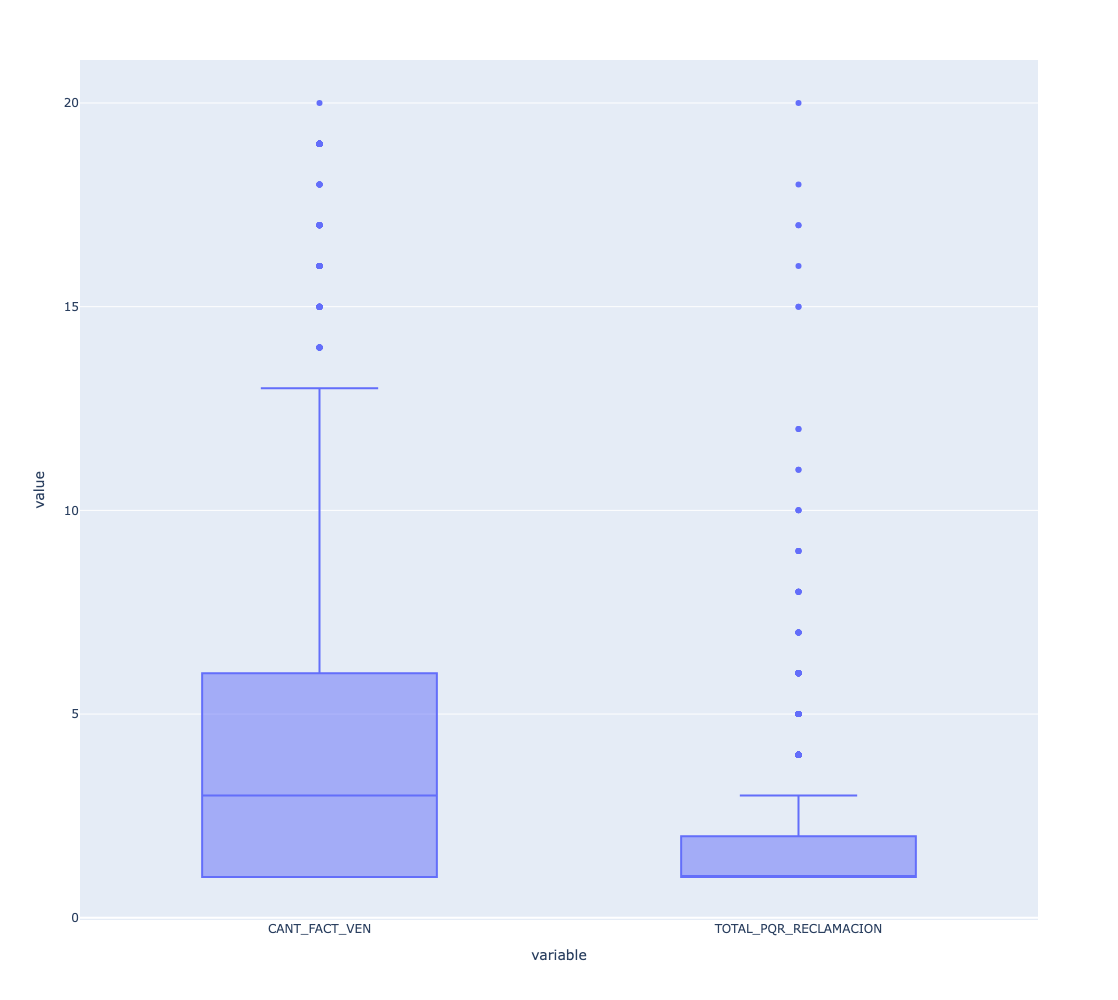

In [107]:
fig = px.box(df2, y=['CANT_FACT_VEN', 'TOTAL_PQR_RECLAMACION'])

fig.update_layout(
    width=1000,  # Ancho de la figura en píxeles
    height=1000  # Alto de la figura en píxeles
)


fig.show()

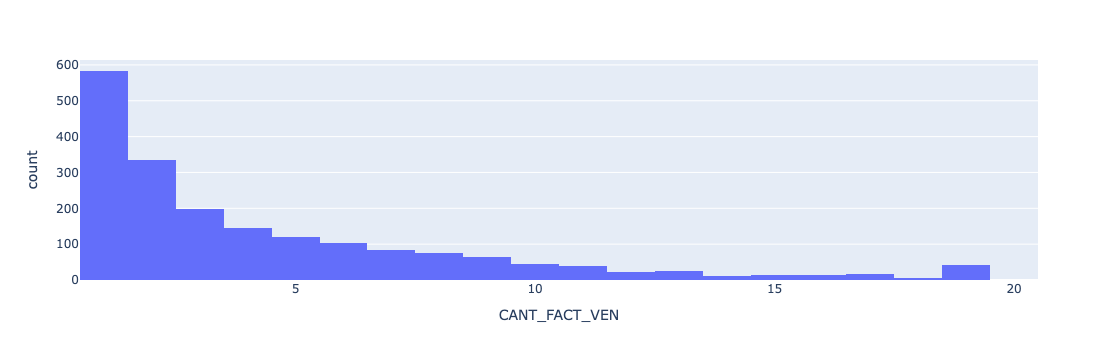

In [17]:
import plotly.express as px
fig = px.histogram(df2, x='CANT_FACT_VEN')
fig.show()

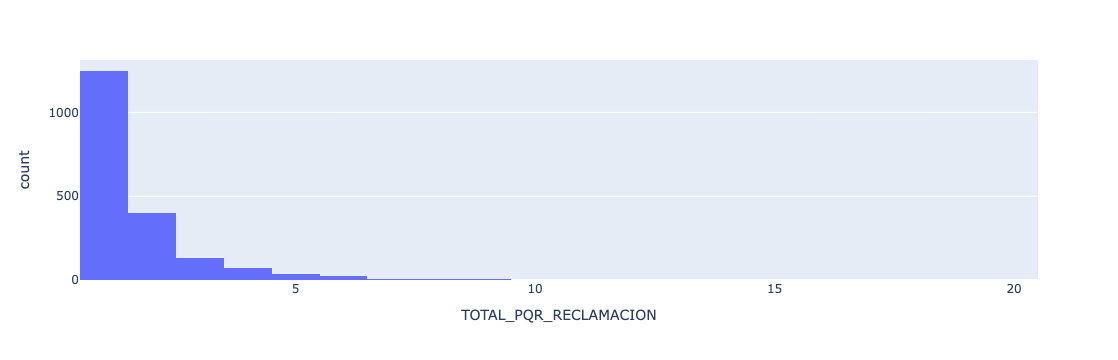

In [232]:
import plotly.express as px
fig = px.histogram(df2, x='TOTAL_PQR_RECLAMACION')
fig.show()

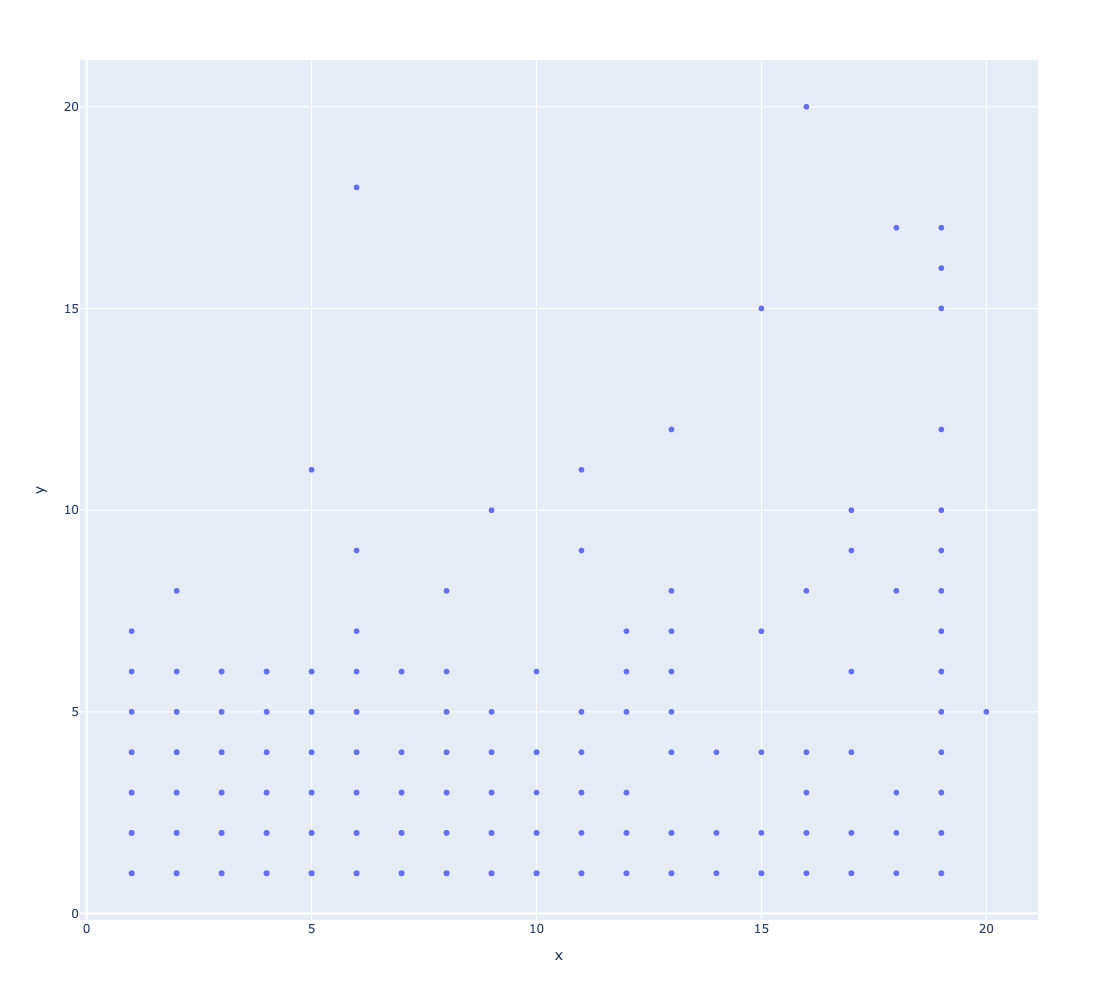

In [109]:
# Grafico de dispersión
fig = px.scatter(x=df2['CANT_FACT_VEN'], y=df2['TOTAL_PQR_RECLAMACION'])

fig.update_layout(
    width=1000,  # Ancho de la figura en píxeles
    height=1000  # Alto de la figura en píxeles
)


fig.show()

In [236]:
# Calcular el coeficiente de correlación de Pearson entre dos columnas
coeficiente_correlacion = df2['CANT_FACT_VEN'].corr(df2['TOTAL_PQR_RECLAMACION'])

# Mostrar el coeficiente de correlación
print(f'Coeficiente de correlación de Pearson: {coeficiente_correlacion}')
print('Conclusión: las variables CANT_FACT_VEN y TOTAL_PQR_RECLAMACION presentan una correlación positiva débil, lo cual indica que hay una cantidad considerable de variabilidad en los datos que no se explica por la relación lineal entre las dos variables')

Coeficiente de correlación de Pearson: 0.29387839746774513
Conclusión: las variables CANT_FACT_VEN y TOTAL_PQR_RECLAMACION presentan una correlación positiva débil, lo cual indica que hay una cantidad considerable de variabilidad en los datos que no se explica por la relación lineal entre las dos variables


In [ ]:
# Se procede a identificar outliers en las variables

In [296]:
#Función para calcular IQR

def find_outliers_IQR(df2):
   q1=df2.quantile(0.25)
   q3=df2.quantile(0.75)
   IQR=q3-q1
   outliers = df2[ ((df2<(q1-1.5*IQR)) | (df2>(q3+1.5*IQR))) ]
   return outliers

In [358]:
#Se identifican outliers en la variable CANT_FACT_VEN

outliers = find_outliers_IQR(df2['CANT_FACT_VEN'])

print(f'REUMEN OUTLIERS CANT_FACT_VEN')
print(f'-----------------------------')
print('número de outliers: '+ str(len(outliers)))
print('max valor outlier: ' + str(outliers.max()))
print('min valor outlier: ' + str(outliers.min()))

print(outliers)
outliers.to_excel('outliers_CANT_FACT_VEN.xlsx', index=False, engine='openpyxl')

REUMEN OUTLIERS CANT_FACT_VEN
-----------------------------
número de outliers: 106
max valor outlier: 16.968783290474114
min valor outlier: 14.0
32      16.000000
53      16.968783
71      15.000000
73      16.968783
82      14.000000
          ...    
1871    16.968783
1875    16.968783
1883    16.968783
1884    16.968783
1907    16.968783
Name: CANT_FACT_VEN, Length: 106, dtype: float64


In [368]:
#Se identifican outliers en la variable CANT_FACT_VEN

outliers = find_outliers_IQR(df2['CANT_FACT_VEN'])

print(f'REUMEN OUTLIERS TOTAL_PQR_RECLAMACION')
print(f'-----------------------------')
print('número de outliers: '+ str(len(outliers)))
print('max valor outlier: ' + str(outliers.max()))
print('min valor outlier: ' + str(outliers.min()))

print(outliers)
outliers.to_excel('outliers_CANT_FACT_VEN.xlsx', index=False, engine='openpyxl')

REUMEN OUTLIERS TOTAL_PQR_RECLAMACION
-----------------------------
número de outliers: 106
max valor outlier: 16.968783290474114
min valor outlier: 14.0
32      16.000000
53      16.968783
71      15.000000
73      16.968783
82      14.000000
          ...    
1871    16.968783
1875    16.968783
1883    16.968783
1884    16.968783
1907    16.968783
Name: CANT_FACT_VEN, Length: 106, dtype: float64


In [370]:
# Crera una función para para encontrar outliers con  IQR

def drop_outliers_IQR(df2):

   q1=df2.quantile(0.25)
   q3=df2.quantile(0.75)
   IQR=q3-q1

   # No outliers
   not_outliers = df2[~((df2<(q1-1.5*IQR)) | (df2>(q3+1.5*IQR)))]

   # datos limpios
   outliers_clean = not_outliers.dropna().reset_index()

   return outliers_clean

In [372]:
# LLamamos la función para CANT_FACT_VEN

outliers_clean = drop_outliers_IQR(df2['CANT_FACT_VEN'])

print('number of outliers: '+ str(len(outliers_clean)))
print('max outlier value: ' + str(outliers_clean.max()))
print('min outlier value: ' + str(outliers_clean.min()))

print(outliers_clean)
outliers_clean.to_excel('outliers_clean_CANT_FACT_VEN.xlsx', index=False, engine='openpyxl')


number of outliers: 1833
max outlier value: index            1938.0
CANT_FACT_VEN      13.0
dtype: float64
min outlier value: index            0.0
CANT_FACT_VEN    1.0
dtype: float64
      index  CANT_FACT_VEN
0         0            2.0
1         1           10.0
2         2            4.0
3         3            1.0
4         4            1.0
...     ...            ...
1828   1934            3.0
1829   1935            4.0
1830   1936            2.0
1831   1937            1.0
1832   1938            3.0

[1833 rows x 2 columns]


In [374]:
# LLamamos la función para TOTAL_PQR_RECLAMACION

outliers_clean = drop_outliers_IQR(df2['TOTAL_PQR_RECLAMACION'])

print('number of outliers: '+ str(len(outliers_clean)))
print('max outlier value: ' + str(outliers_clean.max()))
print('min outlier value: ' + str(outliers_clean.min()))

print(outliers_clean)
outliers_clean.to_excel('outliers_clean_TOTAL_PQR_RECLAMACION.xlsx', index=False, engine='openpyxl')


number of outliers: 1778
max outlier value: index                    1938.0
TOTAL_PQR_RECLAMACION       3.0
dtype: float64
min outlier value: index                    0.0
TOTAL_PQR_RECLAMACION    1.0
dtype: float64
      index  TOTAL_PQR_RECLAMACION
0         0                    1.0
1         2                    1.0
2         3                    1.0
3         4                    1.0
4         5                    1.0
...     ...                    ...
1773   1934                    1.0
1774   1935                    1.0
1775   1936                    2.0
1776   1937                    1.0
1777   1938                    1.0

[1778 rows x 2 columns]


In [356]:
#Se identifica que tipo de dato es la serie outliers
type(outliers)


pandas.core.series.Series

In [ ]:
# Método imputación outliers por medio de limite superior e inferior.

In [328]:
# Identificamos los valores máximo y mínimo

upper_limit = df2['CANT_FACT_VEN'].mean() + 3*df2['CANT_FACT_VEN'].std()
lower_limit = df2['CANT_FACT_VEN'].mean() - 3* df2['CANT_FACT_VEN'].std()
print(lower_limit)
print(upper_limit)

-8.12056503620662
16.968783290474114


In [330]:
# Creamos un arreglo de 10 elementos como ejemplo de lo que realizará el algoritmo.
a = np.arange(10)
print(type(a))
print (a)

# si se cumple la condición "a<5" se coloca el valor de a (0,1,2,3,4) cuando no se cumple la condición se aplica la segunda formula 10*a (50,60,70,80,90)
b = np.where(a < 5, a, 10*a)
print(b)

<class 'numpy.ndarray'>
[0 1 2 3 4 5 6 7 8 9]
[ 0  1  2  3  4 50 60 70 80 90]


In [332]:
# Se imputan outliers en variable CANT_FACT_VEN
# cuando df2['CANT_FACT_VEN'] > upper_limit colocar upper limit
# cuando df2['CANT_FACT_VEN'] < lower_limit colocar lower_limit

df2['CANT_FACT_VEN'] = np.where(df2['CANT_FACT_VEN'] > upper_limit, upper_limit, np.where( df2['CANT_FACT_VEN'] < lower_limit,lower_limit, df2['CANT_FACT_VEN']))

In [334]:
# Se imputan outliers en variable TOTAL_PQR_RECLAMACION
# cuando df2['TOTAL_PQR_RECLAMACION'] > upper_limit colocar upper limit
# cuando df2['TOTAL_PQR_RECLAMACION'] < lower_limit colocar lower_limit

df2['TOTAL_PQR_RECLAMACION'] = np.where(df2['TOTAL_PQR_RECLAMACION'] > upper_limit, upper_limit, np.where( df2['TOTAL_PQR_RECLAMACION'] < lower_limit,lower_limit, df2['TOTAL_PQR_RECLAMACION']))

In [336]:
df2.describe()

,CLIENTE_ID,CANTIDAD_CICLOS,CANT_FACT_VEN,TOTAL_PQR_RECLAMACION
count,1.939000e+03,1939.000000,1939.000000,1939.000000
mean,1.040254e+06,18.219185,4.413068,1.736398
std,2.875462e+04,2.473789,4.147727,1.573865
min,1.000001e+06,2.000000,1.000000,1.000000
25%,1.017848e+06,19.000000,1.000000,1.000000
50%,1.024944e+06,19.000000,3.000000,1.000000
75%,1.074320e+06,19.000000,6.000000,2.000000
max,1.088762e+06,20.000000,16.968783,16.968783


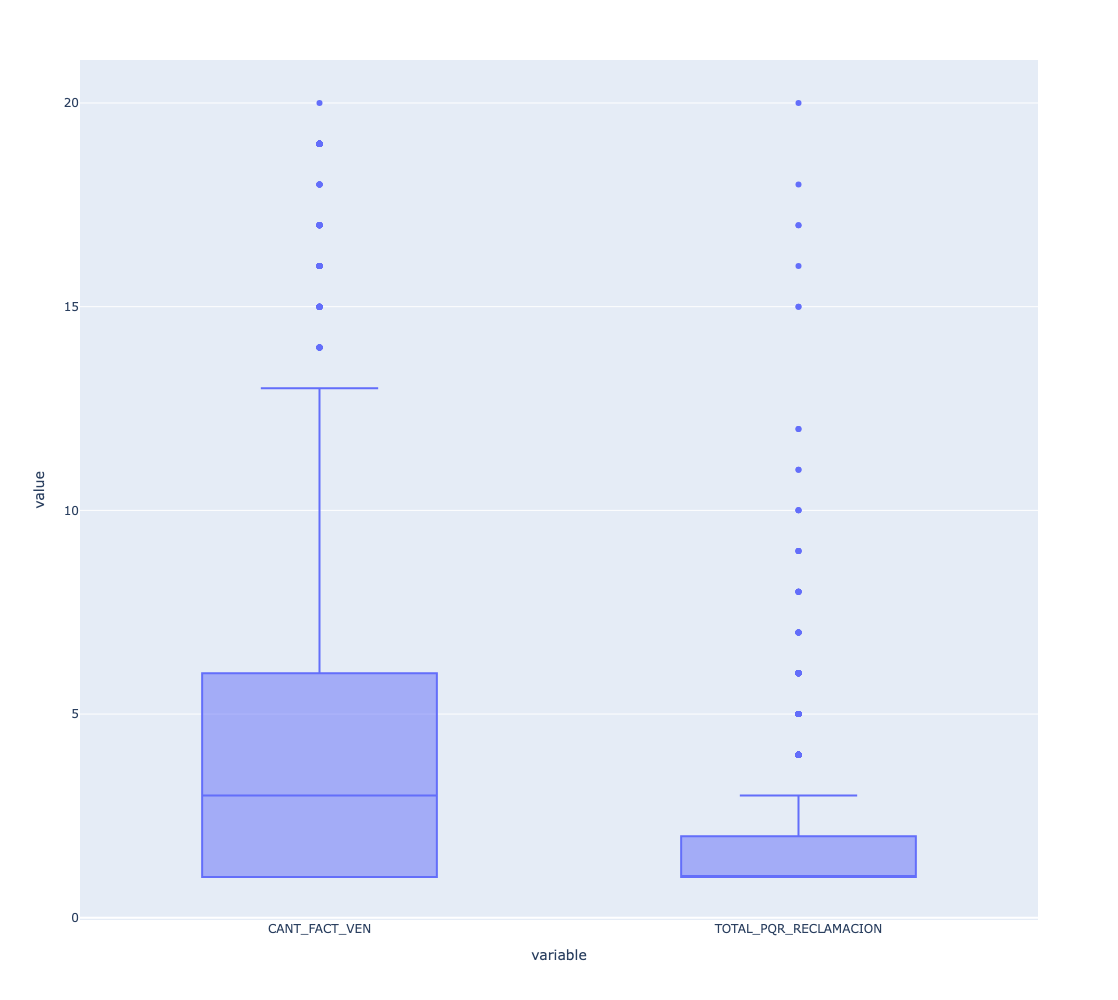

In [111]:
fig = px.box(df2, y=['CANT_FACT_VEN', 'TOTAL_PQR_RECLAMACION'])

fig.update_layout(
    width=1000,  # Ancho de la figura en píxeles
    height=1000  # Alto de la figura en píxeles
)


fig.show()

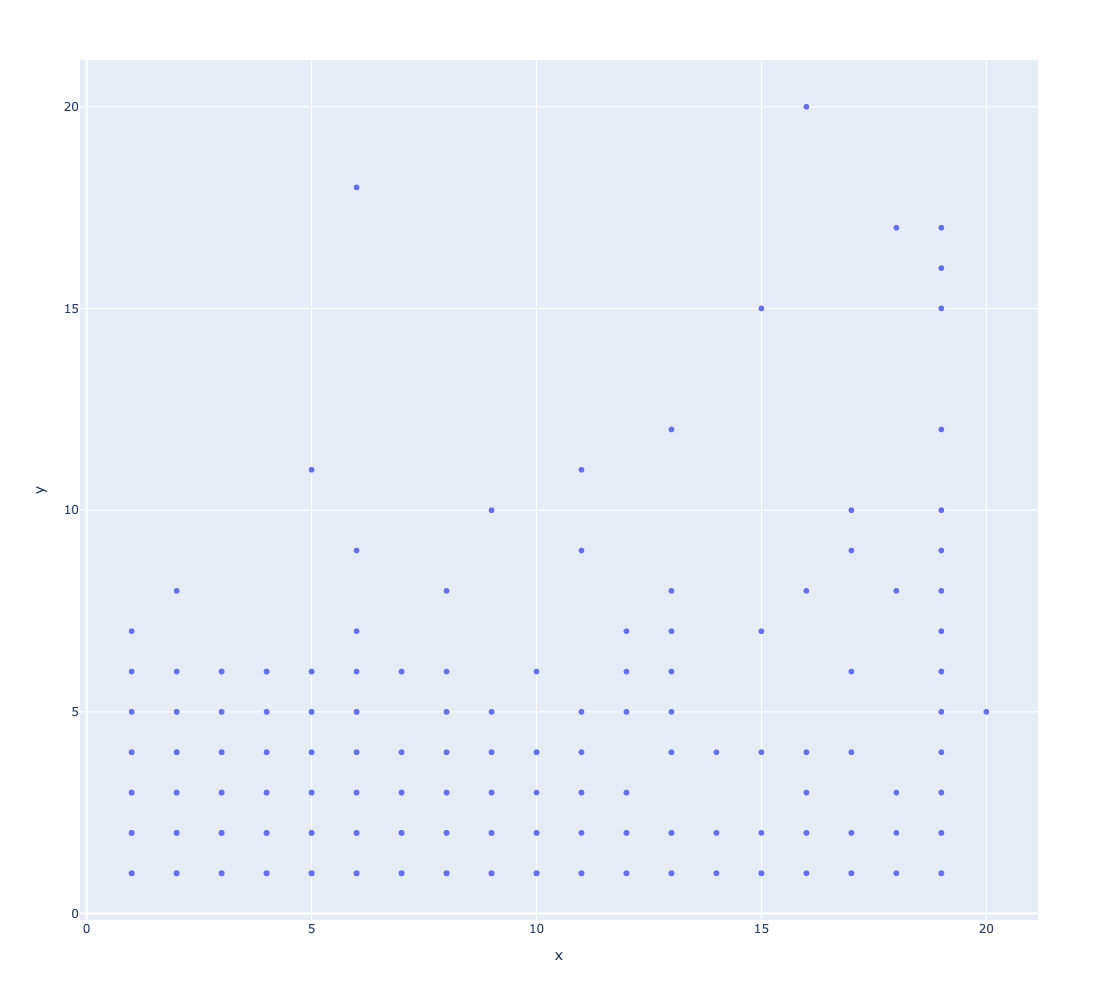

In [113]:
# Grafico de dispersión
fig = px.scatter(x=df2['CANT_FACT_VEN'], y=df2['TOTAL_PQR_RECLAMACION'])

fig.update_layout(
    width=1000,  # Ancho de la figura en píxeles
    height=1000  # Alto de la figura en píxeles
)


fig.show()

In [342]:
# Calcular el coeficiente de correlación de Pearson entre dos columnas
coeficiente_correlacion = df2['CANT_FACT_VEN'].corr(df2['TOTAL_PQR_RECLAMACION'])

# Mostrar el coeficiente de correlación
print(f'Coeficiente de correlación de Pearson: {coeficiente_correlacion}')
print('Conclusión: las variables CANT_FACT_VEN y TOTAL_PQR_RECLAMACION presentan una correlación positiva débil, lo cual indica que hay una cantidad considerable de variabilidad en los datos que no se explica por la relación lineal entre las dos variables')

Coeficiente de correlación de Pearson: 0.28626604104400577
Conclusión: las variables CANT_FACT_VEN y TOTAL_PQR_RECLAMACION presentan una correlación positiva débil, lo cual indica que hay una cantidad considerable de variabilidad en los datos que no se explica por la relación lineal entre las dos variables


In [ ]:
# METODO IMPUTACION DE OUTLIERS POR LA MEDIA

In [123]:
# Importar librería pandas
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

# URL del dataset
filename = "/Users/christianoyola/Documents/GENERAL/Christian/UNIVERSIDAD/MAESTRIA/SEMESTRE 1/ANALISIS EXPLORATORIO DE DATOS/ANALISIS-EXPLORATORIO-DE-DATOS-CFO/1_BASE_ID.xlsx"


# Leer el archivo EXCEL
df3 = pd.read_excel(filename, engine='openpyxl')

df3

,CLIENTE_ID,CANTIDAD_CICLOS,CANT_FACT_VEN,TOTAL_PQR_RECLAMACION
0,1000294,19,2,1
1,1000807,19,10,4
2,1001502,19,4,1
3,1001612,19,1,1
4,1002188,19,1,1
...,...,...,...,...
1934,1084612,13,3,1
1935,1084857,13,4,1
1936,1073884,12,2,2
1937,1087601,10,1,1


In [125]:
df3.describe()

,CLIENTE_ID,CANTIDAD_CICLOS,CANT_FACT_VEN,TOTAL_PQR_RECLAMACION
count,1.939000e+03,1939.000000,1939.000000,1939.000000
mean,1.040254e+06,18.219185,4.463125,1.738525
std,2.875462e+04,2.473789,4.307942,1.595988
min,1.000001e+06,2.000000,1.000000,1.000000
25%,1.017848e+06,19.000000,1.000000,1.000000
50%,1.024944e+06,19.000000,3.000000,1.000000
75%,1.074320e+06,19.000000,6.000000,2.000000
max,1.088762e+06,20.000000,20.000000,20.000000


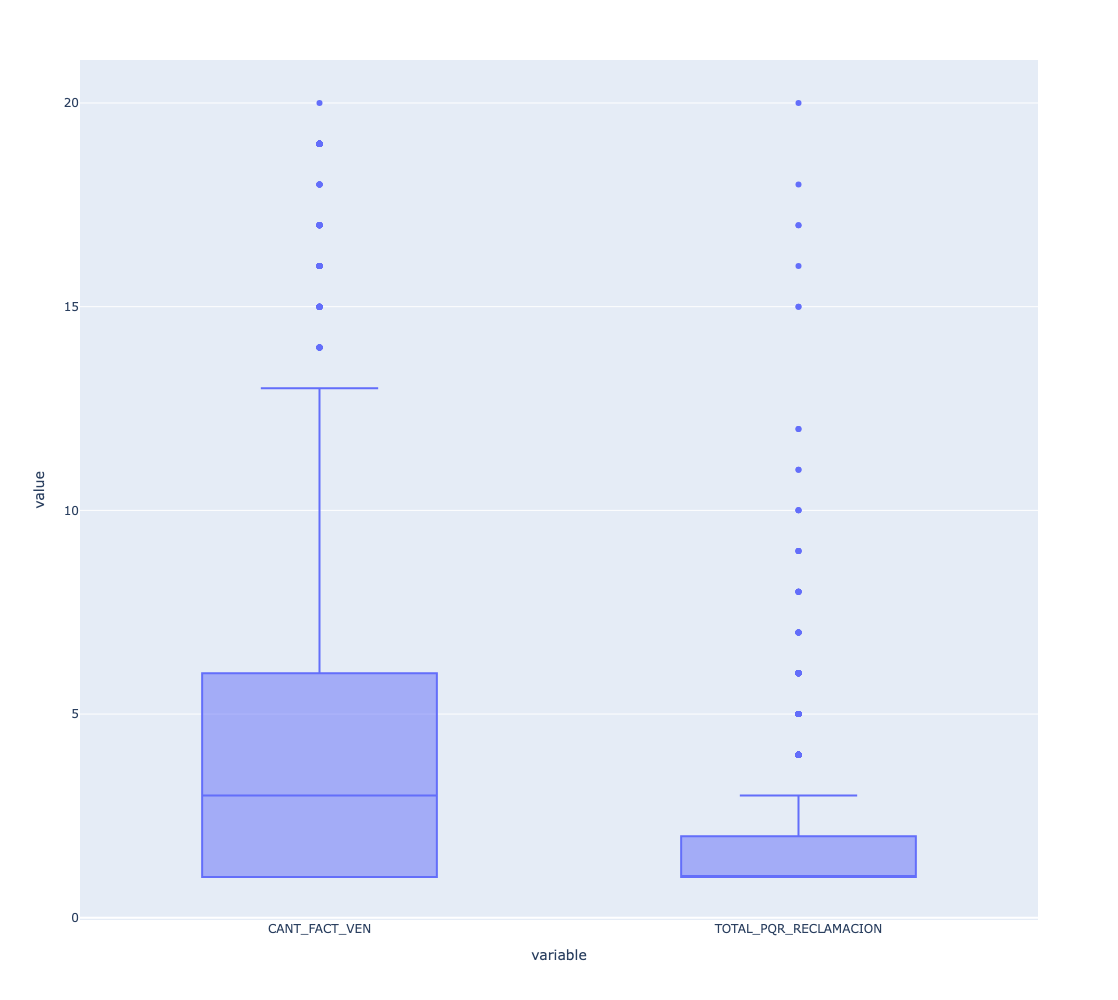

In [127]:
fig = px.box(df3, y=['CANT_FACT_VEN', 'TOTAL_PQR_RECLAMACION'])

fig.update_layout(
    width=1000,  # Ancho de la figura en píxeles
    height=1000  # Alto de la figura en píxeles
)


fig.show()

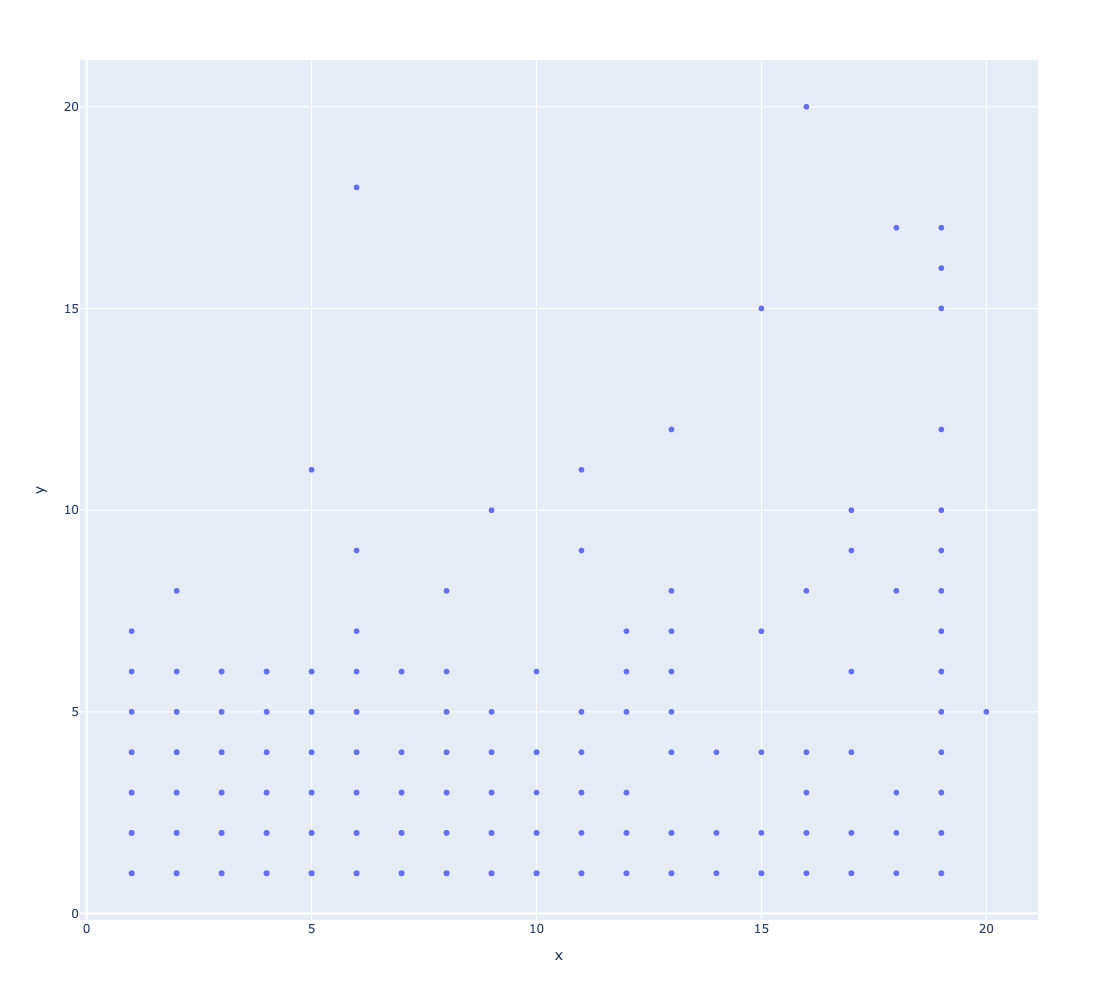

In [129]:
# Grafico de dispersión
fig = px.scatter(x=df3['CANT_FACT_VEN'], y=df3['TOTAL_PQR_RECLAMACION'])

fig.update_layout(
    width=1000,  # Ancho de la figura en píxeles
    height=1000  # Alto de la figura en píxeles
)


fig.show()

In [131]:
# Calcular el coeficiente de correlación de Pearson entre dos columnas
coeficiente_correlacion = df3['CANT_FACT_VEN'].corr(df3['TOTAL_PQR_RECLAMACION'])

# Mostrar el coeficiente de correlación
print(f'Coeficiente de correlación de Pearson: {coeficiente_correlacion}')
print('Conclusión: las variables CANT_FACT_VEN y TOTAL_PQR_RECLAMACION presentan una correlación positiva débil, lo cual indica que hay una cantidad considerable de variabilidad en los datos que no se explica por la relación lineal entre las dos variables')

Coeficiente de correlación de Pearson: 0.29387839746774513
Conclusión: las variables CANT_FACT_VEN y TOTAL_PQR_RECLAMACION presentan una correlación positiva débil, lo cual indica que hay una cantidad considerable de variabilidad en los datos que no se explica por la relación lineal entre las dos variables


In [133]:
# Imputamos los valores por la media

def impute_outliers_IQR(series):
    # Calcular los cuartiles y el IQR
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    IQR = q3 - q1

    # Definir los límites para los valores atípicos
    upper = q3 + 1.5 * IQR
    lower = q1 - 1.5 * IQR

    # Imputar los valores atípicos
    # np.where recibe tres argumentos: condición, valor si la condición es verdadera, valor si es falsa
    series_imputed = np.where(series > upper, 
                              series.mean(),         # valor a imputar si es mayor que el límite superior
                              np.where(series < lower, 
                                       series.mean(),     # valor a imputar si es menor que el límite inferior
                                       series)             # valor original si está dentro del rango
                             )
    
    # Convertir el resultado de nuevo a una Serie de Pandas
    return pd.Series(series_imputed, index=series.index)

In [135]:
#Aplico función a variable CANT_FACT_VEN
df3['CANT_FACT_VEN'] = impute_outliers_IQR(df3['CANT_FACT_VEN'])
df3.describe()['CANT_FACT_VEN']

count    1939.000000
mean        3.769516
std         3.013877
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        13.000000
Name: CANT_FACT_VEN, dtype: float64

In [137]:
#Aplico función a variable TOTAL_PQR_RECLAMACION
df3['TOTAL_PQR_RECLAMACION'] = impute_outliers_IQR(df3['TOTAL_PQR_RECLAMACION'])
df3.describe()['TOTAL_PQR_RECLAMACION']

count    1939.000000
mean        1.403250
std         0.600786
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: TOTAL_PQR_RECLAMACION, dtype: float64

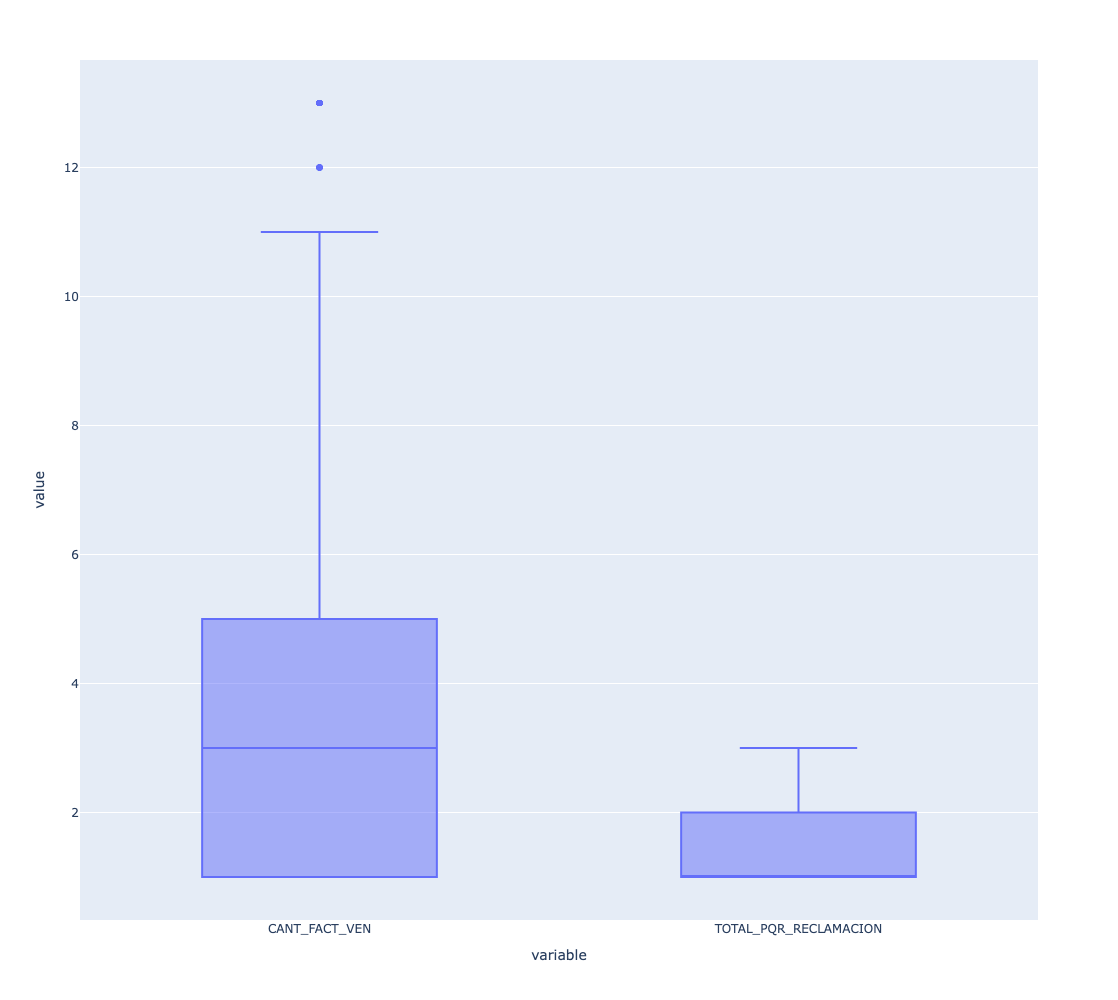

In [141]:
#Genero nuevamente Box Plot para la variable CANT_FACT_VEN
fig = px.box(df3, y=['CANT_FACT_VEN', 'TOTAL_PQR_RECLAMACION'])


fig.update_layout(
    width=1000,  # Ancho de la figura en píxeles
    height=1000  # Alto de la figura en píxeles
)



fig.show()

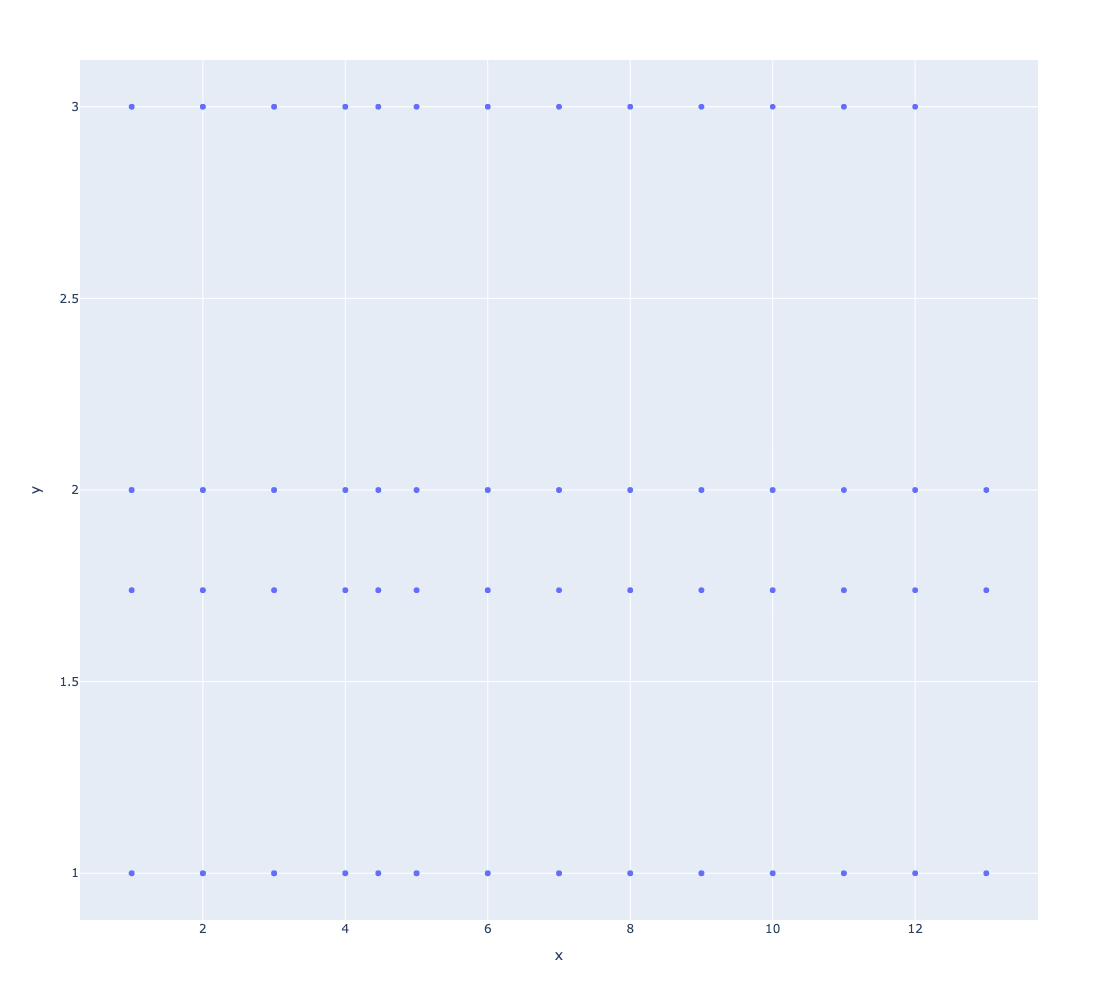

In [143]:
# Se genera nuevamente grafico de dispersión
fig = px.scatter(x=df3['CANT_FACT_VEN'], y=df3['TOTAL_PQR_RECLAMACION'])


fig.update_layout(
    width=1000,  # Ancho de la figura en píxeles
    height=1000  # Alto de la figura en píxeles
)



fig.show()

In [145]:
# Calcular el coeficiente de correlación de Pearson entre dos columnas
coeficiente_correlacion = df3['CANT_FACT_VEN'].corr(df3['TOTAL_PQR_RECLAMACION'])

# Mostrar el coeficiente de correlación
print(f'Coeficiente de correlación de Pearson: {coeficiente_correlacion}')
print('Conclusión: las variables CANT_FACT_VEN y TOTAL_PQR_RECLAMACION no presentan correlacion luego de immputar outliers por medio del metodo de la media')

Coeficiente de correlación de Pearson: 0.04518760048989176
Conclusión: las variables CANT_FACT_VEN y TOTAL_PQR_RECLAMACION no presentan correlacion luego de immputar outliers por medio del metodo de la media


In [ ]:
### Método eliminación de outliers identificados previamente en ambas variables

In [147]:
# Importar librería pandas
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import plotly.express as px

# URL del dataset
filename = "/Users/christianoyola/Documents/GENERAL/Christian/UNIVERSIDAD/MAESTRIA/SEMESTRE 1/ANALISIS EXPLORATORIO DE DATOS/ANALISIS-EXPLORATORIO-DE-DATOS-CFO/2_BASE_ID_SIN OUTLIERS.xlsx"
pestaña = 'BASE_SIN_OUTLIERS'

# Leer el archivo EXCEL
df4 = pd.read_excel(filename, engine='openpyxl', sheet_name=pestaña)

df4

,INDEX,CLIENTE_ID,CANTIDAD_CICLOS,CANT_FACT_VEN,TOTAL_PQR_RECLAMACION
0,0,1000294,19,2,1
1,2,1001502,19,4,1
2,3,1001612,19,1,1
3,4,1002188,19,1,1
4,5,1002209,19,1,1
...,...,...,...,...,...
1700,1934,1084612,13,3,1
1701,1935,1084857,13,4,1
1702,1936,1073884,12,2,2
1703,1937,1087601,10,1,1


In [149]:
df4.describe()

,INDEX,CLIENTE_ID,CANTIDAD_CICLOS,CANT_FACT_VEN,TOTAL_PQR_RECLAMACION
count,1705.000000,1.705000e+03,1705.000000,1705.000000,1705.000000
mean,969.977713,1.039805e+06,18.177713,3.597654,1.368915
std,556.635867,2.868116e+04,2.540650,3.008594,0.616171
min,0.000000,1.000001e+06,2.000000,1.000000,1.000000
25%,492.000000,1.017821e+06,19.000000,1.000000,1.000000
50%,972.000000,1.024676e+06,19.000000,2.000000,1.000000
75%,1452.000000,1.073790e+06,19.000000,5.000000,2.000000
max,1938.000000,1.088762e+06,20.000000,13.000000,3.000000


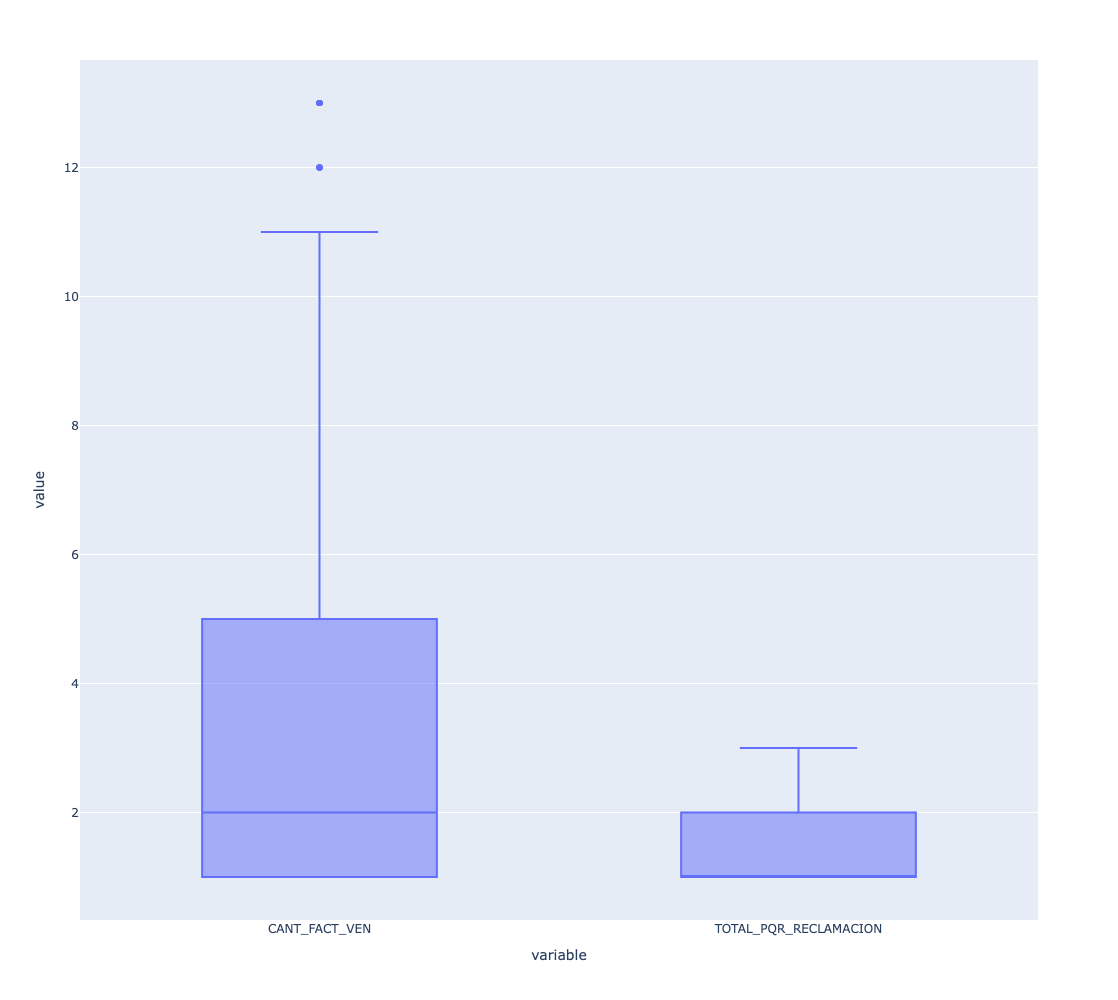

In [151]:
fig = px.box(df4, y=['CANT_FACT_VEN', 'TOTAL_PQR_RECLAMACION'])


fig.update_layout(
    width=1000,  # Ancho de la figura en píxeles
    height=1000  # Alto de la figura en píxeles
)



fig.show()

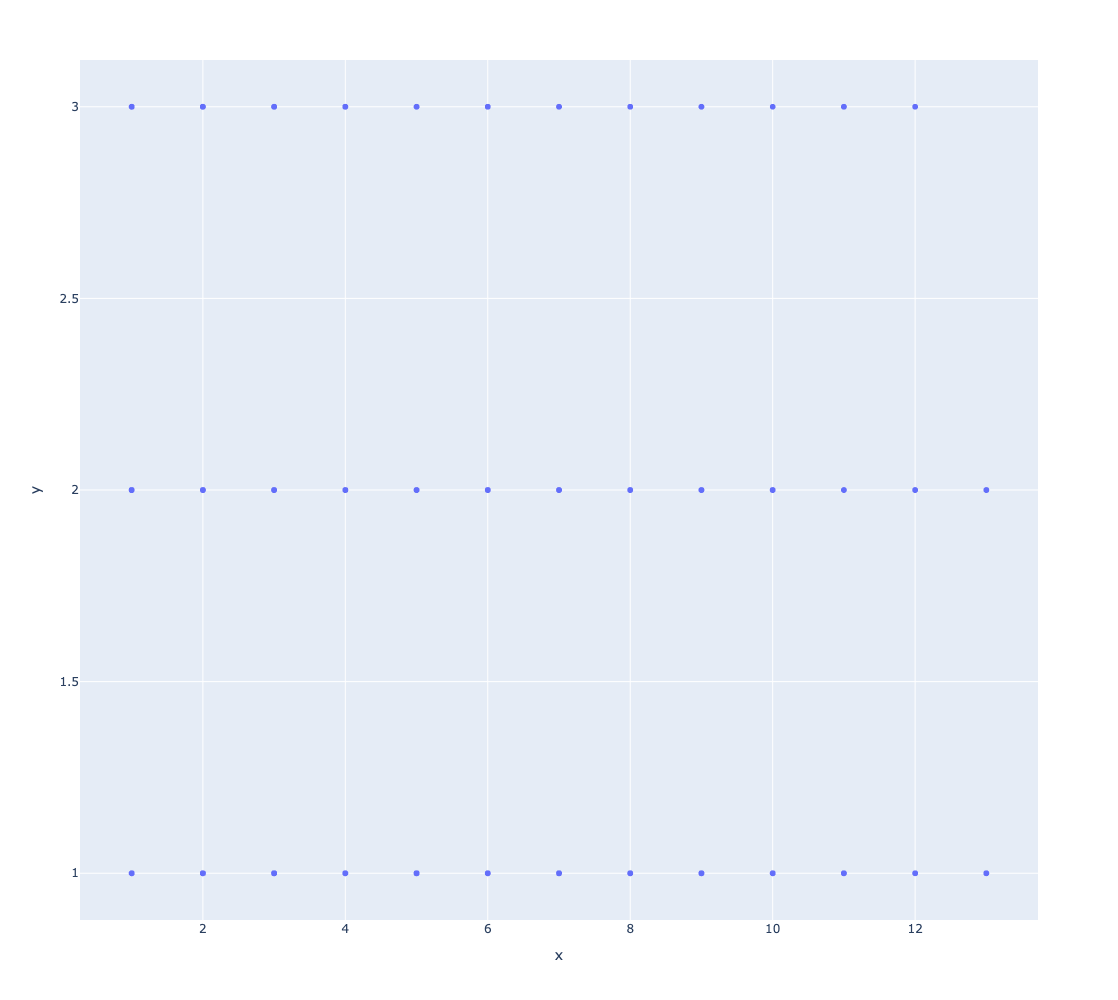

In [153]:
# Grafico de dispersión
fig = px.scatter(x=df4['CANT_FACT_VEN'], y=df4['TOTAL_PQR_RECLAMACION'])


fig.update_layout(
    width=1000,  # Ancho de la figura en píxeles
    height=1000  # Alto de la figura en píxeles
)



fig.show()

In [155]:
# Calcular el coeficiente de correlación de Pearson entre dos columnas
coeficiente_correlacion = df4['CANT_FACT_VEN'].corr(df4['TOTAL_PQR_RECLAMACION'])

# Mostrar el coeficiente de correlación
print(f'Coeficiente de correlación de Pearson: {coeficiente_correlacion}')
print('Conclusión: las variables CANT_FACT_VEN y TOTAL_PQR_RECLAMACION presentan una correlación positiva débil, lo cual indica que hay una cantidad considerable de variabilidad en los datos que no se explica por la relación lineal entre las dos variables')

Coeficiente de correlación de Pearson: 0.02028422950171211
Conclusión: las variables CANT_FACT_VEN y TOTAL_PQR_RECLAMACION presentan una correlación positiva débil, lo cual indica que hay una cantidad considerable de variabilidad en los datos que no se explica por la relación lineal entre las dos variables


In [ ]:
# CONCLUSION GENERAL: las variables CANT_FACT_VEN y TOTAL_PQR_RECLAMACION no estan lo suficientemente correlacionadas para proceder con predicción.